<a href="https://colab.research.google.com/github/misbakhanum/SCT_ML_2/blob/main/SCT_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pandas scikit-learn openpyxl


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


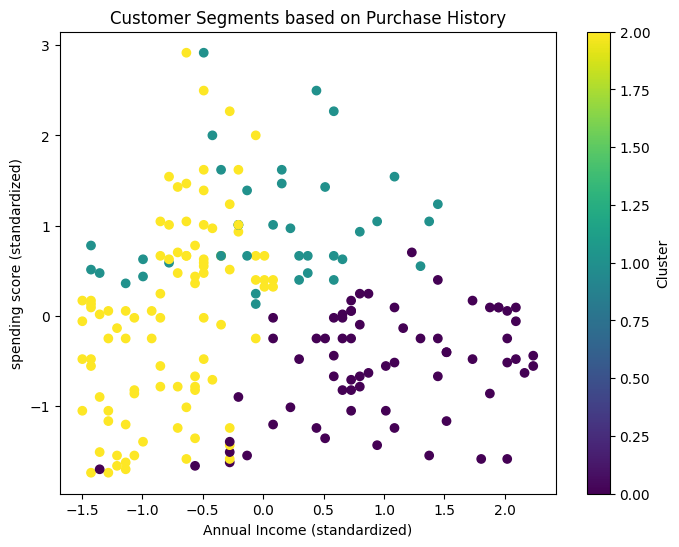

Cluster Centers (in original scale):
[[52.60869565 46.07246377 39.33333333]
 [39.36842105 86.5        19.57894737]
 [28.43010753 60.70967742 70.77419355]]


In [ ]:
# Step 1: Load the data (assuming you have a CSV file with purchase history)
data = pd.read_csv('/content/Mall_Customers.csv')

# Display the first few rows
print(data.head())

# Step 2: Select relevant features (for example: Total Purchases, Amount Spent, etc.)
X = data[[ 'Age' , 'Annual Income (k$)',  'Spending Score (1-100)']]

# Step 3: Standardize the features (K-means works better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-means clustering
# Let's choose 3 clusters for this example
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Step 5: Visualize the clusters (using the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments based on Purchase History')
plt.xlabel('Annual Income (standardized)')
plt.ylabel('spending score (standardized)')
plt.colorbar(label='Cluster')
plt.show()

# Step 6: Analyze cluster centers
print("Cluster Centers (in original scale):")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Optionally save the results
data.to_csv('customer_segments.csv', index=False)